In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import os
import seaborn as sns

In [29]:
os.chdir('C://Users//DELL//Desktop//assignments for adwisor//cab  fare prediction')

In [30]:
train_data=pd.read_csv('C://Users//DELL//Desktop//assignments for adwisor//cab  fare prediction//train_cab.csv')

In [31]:
test_data=pd.read_csv('C://Users//DELL//Desktop//assignments for adwisor//cab  fare prediction//test.csv')

In [32]:
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [33]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [34]:
#we will be checking each column of data for noise, missing values and outliers

In [35]:
##checking the  passenger count we can have max 6 passengers if we consider a SUV passeneger count having more than 
##6 will be noise

In [36]:
train_data['passenger_count'].describe()
## here we can see that the max is showing 5345 which is not possible 

count    16012.000000
mean         2.625070
std         60.844122
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [37]:
test_data.passenger_count.describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [38]:
train_data=train_data.drop(train_data[train_data['passenger_count']>6].index, axis=0)

In [39]:
train_data=train_data.drop(train_data[train_data['passenger_count']==0].index, axis=0)

In [40]:
train_data.passenger_count.describe()
## now we have successfully removed the noise values.

count    15935.000000
mean         1.649540
std          1.265914
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [41]:
##checking for missing values and removing it
train_data.passenger_count.isnull().sum()

55

In [42]:
train_data=train_data.drop(train_data[train_data['passenger_count'].isnull()].index, axis=0)

In [43]:
train_data.passenger_count.isnull().sum()
train_data = train_data.drop(train_data[train_data["passenger_count"] == 1.3 ].index, axis=0)
train_data = train_data.drop(train_data[train_data["passenger_count"] == 0.12 ].index, axis=0)
## we removed noise and missing values from passenger_count

In [44]:
## checking fare amount
train_data.fare_amount=pd.to_numeric(train_data['fare_amount'],errors='coerce')

In [45]:
train_data.fare_amount.describe()

count    15909.000000
mean        15.059584
std        432.255921
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [46]:
train_data.fare_amount.sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [47]:
##from above we can see that fare amount cannot be this high so these are the outliers which are to be removed

In [48]:
from collections import Counter
Counter(train_data.fare_amount<0)

Counter({False: 15930, True: 3})

In [49]:
train_data=train_data.drop(train_data[train_data['fare_amount']<0].index, axis=0)

In [50]:
train_data['fare_amount'].min()

0.0

In [51]:
train_data=train_data.drop(train_data[train_data['fare_amount']<1].index, axis=0)

In [52]:
## cab fare can go maximun upto to 2000 but it cannot go upto 50000 or more so here i am considering a threshold value of 2000

In [53]:
train_data=train_data.drop(train_data[train_data['fare_amount']>2000].index, axis=0)

In [54]:
train_data.fare_amount.describe()

count    15902.000000
mean        11.376261
std         10.814901
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [55]:
train_data.fare_amount.isnull().sum()

24

In [56]:
## removing nan values
train_data=train_data.drop(train_data[train_data['fare_amount'].isnull()].index, axis=0)

In [57]:
train_data.fare_amount.isnull().sum()
## fare amount is cleared from missing values and noise

0

In [58]:
## now converting time data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15902 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15902 non-null  float64
 1   pickup_datetime    15902 non-null  object 
 2   pickup_longitude   15902 non-null  float64
 3   pickup_latitude    15902 non-null  float64
 4   dropoff_longitude  15902 non-null  float64
 5   dropoff_latitude   15902 non-null  float64
 6   passenger_count    15902 non-null  float64
dtypes: float64(6), object(1)
memory usage: 993.9+ KB


In [59]:
train_data=train_data.drop(train_data[train_data['pickup_datetime'].isnull()].index, axis=0)

In [60]:
test_data=test_data.drop(test_data[test_data['pickup_datetime'].isnull()].index, axis=0)

In [61]:
train_data['pickup_datetime']=pd.to_datetime(train_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')

In [62]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')

In [63]:
train_data['year']=train_data['pickup_datetime'].dt.year
train_data['month']=train_data['pickup_datetime'].dt.month
train_data['date']=train_data['pickup_datetime'].dt.day
train_data['day']=train_data['pickup_datetime'].dt.dayofweek
train_data['hour']=train_data['pickup_datetime'].dt.hour
train_data['min']=train_data['pickup_datetime'].dt.minute

In [64]:
train_data.drop('pickup_datetime', axis=1, inplace=True)

In [65]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,min
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [66]:
test_data['year']=test_data['pickup_datetime'].dt.year
test_data['month']=test_data['pickup_datetime'].dt.month
test_data['date']=test_data['pickup_datetime'].dt.day
test_data['day']=test_data['pickup_datetime'].dt.dayofweek
test_data['hour']=test_data['pickup_datetime'].dt.hour
test_data['min']=test_data['pickup_datetime'].dt.minute

In [67]:
test_data.drop('pickup_datetime', axis=1, inplace=True)

In [68]:
## now checking locations 
## the lattitude should be between -90 to 90
## longitude should be between -180 to 180

In [69]:
##train data pick up
train_data=train_data.drop(train_data[train_data['pickup_latitude']<-90].index, axis=0)
train_data=train_data.drop(train_data[train_data['pickup_latitude']>90].index, axis=0)
train_data=train_data.drop(train_data[train_data['pickup_longitude']<-180].index, axis=0)
train_data=train_data.drop(train_data[train_data['pickup_longitude']>180].index, axis=0)

In [70]:
##train data drop off
train_data=train_data.drop(train_data[train_data['dropoff_latitude']<-90].index, axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_latitude']>90].index, axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_longitude']<-180].index, axis=0)
train_data=train_data.drop(train_data[train_data['dropoff_longitude']>180].index, axis=0)

In [71]:
##test data pick up
test_data=test_data.drop(test_data[test_data['pickup_latitude']<-90].index, axis=0)
test_data=test_data.drop(test_data[test_data['pickup_latitude']>90].index, axis=0)
test_data=test_data.drop(test_data[test_data['pickup_longitude']<-180].index, axis=0)
test_data=test_data.drop(test_data[test_data['pickup_longitude']>180].index, axis=0)

In [72]:
##test data drop off
test_data=test_data.drop(test_data[test_data['dropoff_latitude']<-90].index, axis=0)
test_data=test_data.drop(test_data[test_data['dropoff_latitude']>90].index, axis=0)
test_data=test_data.drop(test_data[test_data['dropoff_longitude']<-180].index, axis=0)
test_data=test_data.drop(test_data[test_data['dropoff_longitude']>180].index, axis=0)

In [73]:
## now we need to calculate the distance between the locations
train_data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 1
month                1
date                 1
day                  1
hour                 1
min                  1
dtype: int64

In [74]:
train_data=train_data.drop(train_data[train_data['year'].isnull()].index, axis=0)
train_data=train_data.drop(train_data[train_data['month'].isnull()].index, axis=0)
train_data=train_data.drop(train_data[train_data['date'].isnull()].index, axis=0)
train_data=train_data.drop(train_data[train_data['day'].isnull()].index, axis=0)
train_data=train_data.drop(train_data[train_data['hour'].isnull()].index, axis=0)
train_data=train_data.drop(train_data[train_data['min'].isnull()].index, axis=0)

In [75]:
test_data.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
min                  0
dtype: int64

In [76]:
#we would need to use haversine function to get the distance bet two point
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [77]:
train_data['distance']=train_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis=1)

In [78]:
test_data['distance']=test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis=1)

In [79]:
train_data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [80]:
train_data.head()

,fare_amount,passenger_count,year,month,date,day,hour,min,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [81]:
test_data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [82]:
##we have successfully cleaned the data and now we will be moving to the visualisation part

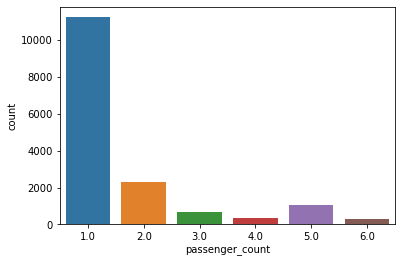

In [84]:
sns.countplot(data=train_data,x='passenger_count')

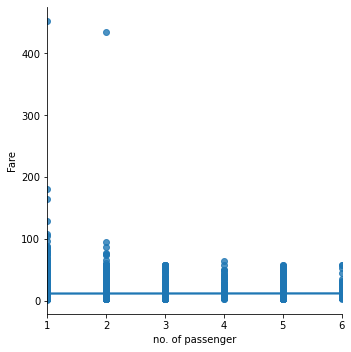

In [85]:
sns.lmplot(data=train_data,x='passenger_count', y='fare_amount')
plt.xlabel('no. of passenger')
plt.ylabel('Fare')
plt.show()
## here we can see that max fare is earned by single or doulble occupancy

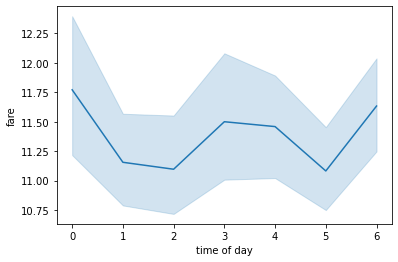

In [86]:
sns.lineplot(data=train_data, x='day',y='fare_amount')
plt.xlabel('time of day')
plt.ylabel('fare')
plt.show()

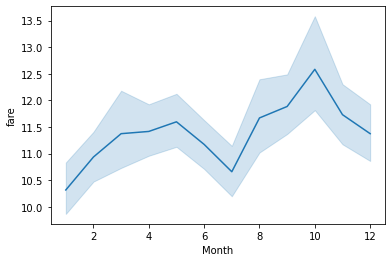

In [87]:
sns.lineplot(data=train_data, x='month',y='fare_amount')
plt.xlabel('Month')
plt.ylabel('fare')
plt.show()

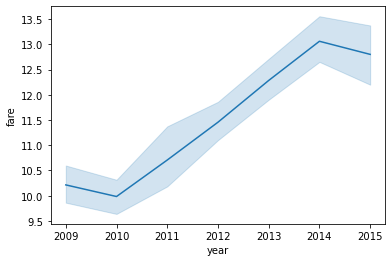

In [88]:
sns.lineplot(data=train_data, x='year',y='fare_amount')
plt.xlabel('year')
plt.ylabel('fare')
plt.show()

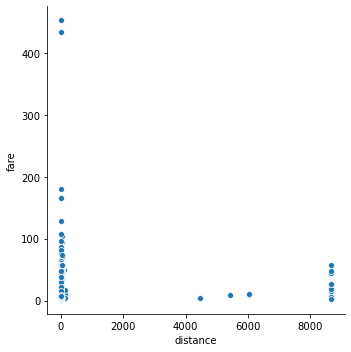

In [89]:
sns.relplot(data=train_data,x='distance', y='fare_amount')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

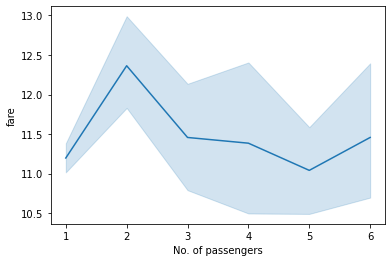

In [90]:
sns.lineplot(data=train_data, x='passenger_count', y='fare_amount')
plt.xlabel('No. of passengers')
plt.ylabel('fare')
plt.show()
## from here we can see that earnings were high when 2 passengers were travelling 

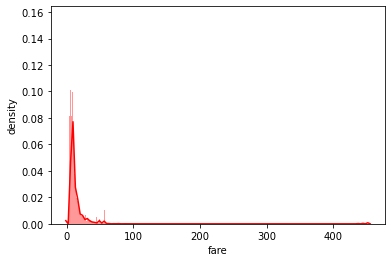

In [91]:
sns.distplot(train_data['fare_amount'], bins='auto',color='red')
plt.xlabel('fare')
plt.ylabel('density')
plt.show()

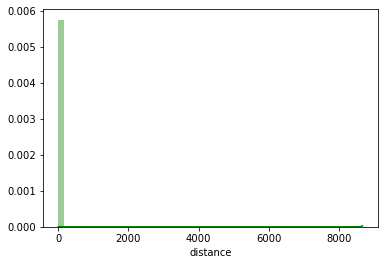

In [92]:
sns.distplot(train_data['distance'], color='green')

In [93]:
train=train_data.copy()

In [95]:
## alos tried to use standarization but the results were not as expected

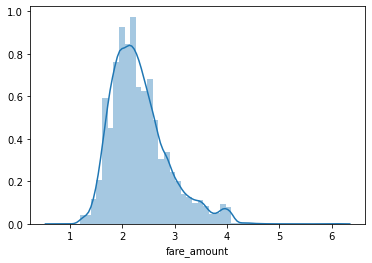

In [96]:
## using normalization
train['fare_amount']=np.log1p(train['fare_amount'])
sns.distplot(train['fare_amount'])

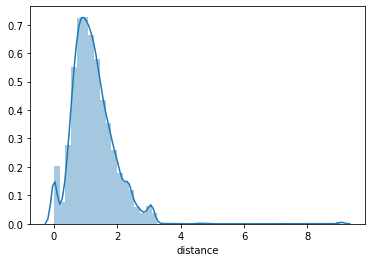

In [97]:
## using normalization
train['distance']=np.log1p(train_data['distance'])
sns.distplot(train['distance'])

In [98]:
x_n=train.drop('fare_amount', axis=1)
y_n=train['fare_amount']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_n,y_n, test_size=0.2, random_state=44)

In [100]:
## using linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [101]:
LR.fit(x_train,y_train)

LinearRegression()

In [102]:
predictions_LR_N=LR.predict(x_test)

In [103]:
##calculating RMSE for test data
from sklearn.metrics import mean_squared_error, r2_score
RMSE_test_LR_n= np.sqrt(mean_squared_error(y_test, predictions_LR_N))

In [104]:
RMSE_test_LR_n

0.3605441853323629

In [105]:
print(r2_score(y_test, predictions_LR_N))

0.5624985651928648


In [106]:
## using decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [107]:
predict_dtr=dtr.predict(x_test)

In [108]:
rsme_dtr=np.sqrt(mean_squared_error(y_test, predict_dtr))

In [109]:
rsme_dtr

0.3754528568087131

In [110]:
print(r2_score(y_test, predict_dtr))

0.5255687185890549


In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
predict_rfr=rfr.predict(x_test)

In [113]:
print(r2_score(y_test,predict_rfr))

0.7436206208568812


In [114]:
rmse=np.sqrt(mean_squared_error(y_test, predict_rfr))

In [115]:
rmse

0.27600077452631666

In [116]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05)
r.fit(x_train,y_train,)

Ridge(alpha=0.05)

In [117]:
predicted_r=r.predict(x_test)

In [118]:
print(r2_score(y_test,predicted_r))

0.5624982494993072


In [119]:
from sklearn.linear_model import Lasso
la=Lasso()

In [120]:
la.fit(x_train,y_train)

Lasso()

In [121]:
prediction=la.predict(x_test)

In [122]:
rsme_r=np.sqrt(mean_squared_error(y_test, prediction))

In [123]:
rsme_r

0.5451313669816209

In [124]:
print(r2_score(y_test,prediction))

-0.00014929738098934386


In [125]:
## using gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)

GradientBoostingRegressor()

In [126]:
prediction_grad=grad.predict(x_test)

In [127]:
rsme_grad=np.sqrt(mean_squared_error(y_test,prediction_grad))

In [128]:
print(rsme_grad)

0.2686040299830529


In [129]:
print(r2_score(y_test,prediction_grad))

0.7571782758566201


In [130]:
## using hyper parameter tuning for randon forest
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [131]:
rfr = RandomForestRegressor(random_state = 1)

In [132]:
grid_search=GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0,return_train_score=True)

In [133]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [134]:
prediction_grid=grid_search.predict(x_test)

In [135]:
rmse=np.sqrt(mean_squared_error(y_test, prediction_grid))

In [136]:
print(rmse)

0.2764942575353456


In [137]:
print(r2_score(y_test, prediction_grid))

0.7427030004328368


In [138]:
## using grid search on gradient boost
from sklearn.model_selection import GridSearchCV
param_grid=param_grid = { 'max_depth': [5, 10, 2], 'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'learning_rate':[0.01,0.05,0.1,0.2]}

In [139]:
grid_grad=GridSearchCV(estimator=grad,param_grid=param_grid, n_jobs=1,return_train_score=True,cv=3,verbose=0)

In [140]:
grid_grad.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [5, 10, 2],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [141]:
prediction_grid_grad=grid_grad.predict(x_test)

In [142]:
rsme_grid_grad=np.sqrt(mean_squared_error(y_test,prediction_grid_grad))

In [143]:
print(rsme_grid_grad)

0.2716580469247613


In [144]:
print(r2_score(y_test,prediction_grid_grad))

0.7516251385033857


In [145]:
grid_grad.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 15}

In [146]:
grid_grad.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, max_features='auto',
                          n_estimators=15)

In [147]:
grid_grad.best_score_

0.762994031805016

In [148]:
##From above we can see that  Gradient boosting  regressor with grid search has best r2_score and RSME

In [149]:
##Now getting the fare amount for test data

In [150]:
test_data.head()

,passenger_count,year,month,date,day,hour,min,distance
0,1,2015,1,27,1,13,8,2.323259
1,1,2015,1,27,1,13,8,2.425353
2,1,2011,10,8,5,11,53,0.618628
3,1,2012,12,1,5,21,12,1.961033
4,1,2012,12,1,5,21,12,5.387301


In [151]:
final_prediction=grad.predict(test_data)

In [152]:
test_data['predicted fare']=final_prediction

In [153]:
test_data.head()

,passenger_count,year,month,date,day,hour,min,distance,predicted fare
0,1,2015,1,27,1,13,8,2.323259,3.445666
1,1,2015,1,27,1,13,8,2.425353,3.533782
2,1,2011,10,8,5,11,53,0.618628,1.829855
3,1,2012,12,1,5,21,12,1.961033,2.856155
4,1,2012,12,1,5,21,12,5.387301,1.973339


In [154]:
test_data.to_csv('Predicted test data')

In [155]:
import pickle
pickle_out=open('predictor.pkl', mode='wb')
pickle.dump(grad, pickle_out)
pickle_out.close()

In [156]:
%%writefile cab_fare_predictor.py
import pickle
import streamlit as st
import pandas as pd
import numpy as np

pickle_in=open('predictor.pkl', mode='rb')
predictor=pickle.load(pickle_in)

def run():       
    add_selectbox=st.sidebar.selectbox(
      "How would like to get the predictions?",
      ('Realtime','Batch'))
    st.sidebar.info('This application helps to predict cab fare')
    if add_selectbox=='Realtime':
        passenger=st.number_input('passengers', min_value=1, max_value=6, value=1)
        hour=st.number_input('hour', min_value=0, max_value=23, value=0)
        mins=st.number_input('mins', min_value=0, max_value=59, value=0)
        day=st.number_input('day', min_value=0, max_value=6, value=0)
        distance=st.number_input('distance',min_value=0, max_value=1000, value=0)
        year=st.number_input('year', min_value=2009, max_value=2015, value=2009)
        date=st.number_input('date', min_value=1, max_value=31, value=1)
        output=''
        input_dict={'passenger':passenger, 'hour':hour,'mins':mins,'day':day,
                'distance':distance,'year':year,'date':date}
        input_df=pd.DataFrame([input_dict])
        if st.button("predict"):
            output=predictor(input_df=input_df)
            output=float(output)
    if add_selectbox=='Batch':
        file_upload=st.file_uploader("upload the csv file", type=['csv'])
        if file_upload is not None:
            data=pd.read_csv(file_upload)
            predictions=predict_model(estimator=predictor, data=data)
            st.write(predictions)
run()


Overwriting cab_fare_predictor.py


In [157]:
!pip install -q streamlit